## In this project we are going to develope a Supervised ML model for predicting a fradulent transaction 
## 

In [1]:
#importing the labriries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#read the csv file
df = pd.read_csv("Fraud.csv")

In [3]:
df.shape
#dff=df.loc[df.columns()]

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.isna().sum()   #cheching for na values , no na values found

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [8]:
#Checking Multi colinearity present respective to 'isFraud' columns
correlation =df.corr()
print(correlation["isFraud"].sort_values(ascending=False)) 
#drop negative correlated features that is oldbalanceDest ,  newbalanceOrig  
#also drop non numerical colums before traing  

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


## Basic EDA

In [9]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

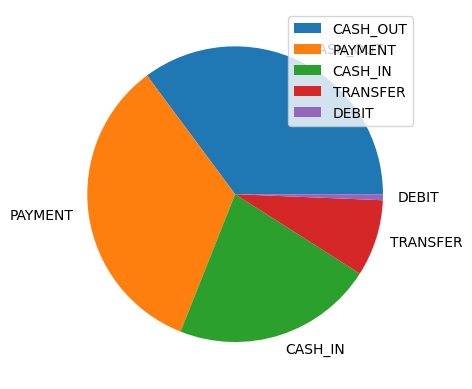

In [23]:
type = df['type'].value_counts()
transaction =['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT']
quantity =type.values
plt.pie(quantity,labels=transaction)
plt.legend()
plt.show()

In [25]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [26]:
#converts transaction type into numerical values for further processing and output varial in string form for better understanding
df['type']=df['type'].map({"CASH_OUT" : 1,"PAYMENT" : 2,"CASH_IN" : 3,"TRANSFER" : 4,"DEBIT" : 5})
df['isFraud']= df['isFraud'].map({0:'No fraud',1:'Fraud'})

In [11]:
df['isFraud']= df['isFraud'].map({0:'No fraud',1:'Fraud'})

In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No fraud,0


In [28]:
#spliting the data into features and output variable
from sklearn.model_selection import train_test_split

x = np.array(df[["type","amount","oldbalanceOrg","newbalanceOrig"]])
#using only 4 feature as nameOrig and nameDest is categorical features and other having multi-colinearity 

y = np.array(df[["isFraud"]])

In [29]:
#for this type of prediction and classification in fraud or not fraud we 
#are going to use Decision Tree , as it captures complex realtion
#between features 

#traning a machine learning model using decision tree

from sklearn.tree import DecisionTreeClassifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9997092392756443

In [30]:
#prediction on new test data 
#features = ["type","amount","oldbalancOrg","newbalanceOrig"]
features = np.array([[4,70000,70000,0.0]])
print(model.predict(features))

['Fraud']


In [ ]:
#done